<a href="https://colab.research.google.com/github/pavankumarchowdary35/NLP-projects/blob/main/Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2024-01-24 14:51:23--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 74.125.26.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.01s   

2024-01-24 14:51:23 (193 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split('\t')
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)


In [7]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [8]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [42]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')             #### w represents alphanumeric and underscore

In [12]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [13]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

1.821831989445342e-231

In [14]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [15]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [16]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [18]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00


In [31]:
from transformers import pipeline
translator = pipeline('translation', model = 'Helsinki-NLP/opus-mt-en-es')

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

In [33]:
from transformers import AutoTokenizer
model_checkpoint = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [37]:
eng2spa_tokens = {}
for eng,  spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [38]:
eng2spa_tokens

{'Go.': [['ve'], ['vete'], ['vaya'], ['váyase']],
 'Hi.': [['hola']],
 'Run!': [['corre']],
 'Run.': [['corred']],
 'Who?': [['quién']],
 'Fire!': [['fuego'], ['incendio'], ['disparad']],
 'Help!': [['ayuda'], ['socorro', 'auxilio'], ['auxilio']],
 'Jump!': [['salta']],
 'Jump.': [['salte']],
 'Stop!': [['parad'], ['para'], ['pare']],
 'Wait!': [['espera']],
 'Wait.': [['esperen']],
 'Go on.': [['continúa'], ['continúe']],
 'Hello!': [['hola']],
 'I ran.': [['corrí'], ['corría']],
 'I try.': [['lo', 'intento']],
 'I won!': [['he', 'ganado']],
 'Oh no!': [['oh', 'no']],
 'Relax.': [['tomátelo', 'con', 'soda']],
 'Smile.': [['sonríe']],
 'Attack!': [['al', 'ataque'], ['atacad']],
 'Get up.': [['levanta']],
 'Go now.': [['ve', 'ahora', 'mismo']],
 'Got it!': [['lo', 'tengo']],
 'Got it?': [['lo', 'pillas'], ['entendiste']],
 'He ran.': [['él', 'corrió']],
 'Hop in.': [['métete', 'adentro']],
 'Hug me.': [['abrázame']],
 'I fell.': [['me', 'caí']],
 'I know.': [['yo', 'lo', 'sé']],
 'I lef

In [32]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [39]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [40]:
eng_phrases_subset = eng_phrases[20_000:20_100]

In [41]:
translations = translator(eng_phrases_subset)

In [46]:

scores =[]
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())
  score = sentence_bleu(matches, spa_pred)
  scores.append(score)




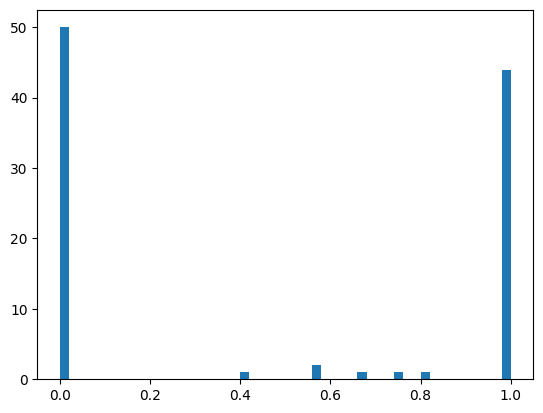

In [47]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [48]:
import numpy as np
np.mean(scores)

0.4780667645403358

In [49]:
np.random.seed(1)

def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:", eng)

  translation = translations[i]['translation_text']
  print("ES Translation:", translation)

  matches = eng2spa[eng]
  print("Matches:", matches)

In [50]:
print_random_translation()

EN: Tom isn't that young.
ES Translation: Tom no es tan joven.
Matches: ['Tom no es tan joven.']
